## Package

In [21]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import torch.optim as optim

## Data set

In [22]:
traindata = datasets.MNIST('data/mnist_train', train=True, download=False, transform=transforms.ToTensor()) # download = True to download

len(traindata)

60000

## Sample

In [23]:
img, label = traindata[np.random.randint(0,60000-1)]
print(label)

5


In [24]:
print(img)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [25]:
img.size()

torch.Size([1, 28, 28])

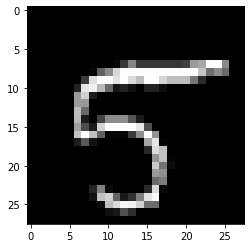

In [26]:
plt.imshow(img.reshape(28,28), cmap='gray')

In [27]:

img_train = img.view(-1).unsqueeze(0)
img_train.size()

torch.Size([1, 784])

## Model

In [28]:

model = nn.Sequential(
        nn.Linear(784, 100),
        nn.ReLU(),
        nn.Linear(100, 10),
        nn.ReLU(),
        nn.Softmax(dim=1))



In [29]:
predict = model(img_train)

print(predict)

predict.size()

tensor([[0.0942, 0.0942, 0.1109, 0.0942, 0.1076, 0.1074, 0.0942, 0.0957, 0.1073,
         0.0942]], grad_fn=<SoftmaxBackward>)


torch.Size([1, 10])

## Loss

### one-hot encoding

In [30]:
label_one_hot = torch.zeros(10).scatter_(0, torch.tensor(label), 1.0).unsqueeze(0)

label, label_one_hot, label_one_hot.size()

(5, tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]]), torch.Size([1, 10]))

### Mean square loss

In [31]:
loss = torch.nn.MSELoss()

loss(predict, label_one_hot)

tensor(0.0886, grad_fn=<MseLossBackward>)

## Train

### Data loader

In [32]:
batch_sz = 600
train_loader = torch.utils.data.DataLoader(traindata, batch_size=batch_sz, shuffle=True)

#img, label = next(iter(train_loader))

### Learn rate

In [33]:
learning_rate = 0.5

### Optimizer

In [34]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

### Batch training

In [35]:
n_epochs = 100
for epoch in range(n_epochs):
    epoch_loss = 0
    for img, label in train_loader:
        label_one_hot = torch.zeros(batch_sz, 10).scatter_(1, label.view(batch_sz,1), 1.0)
        predict = model(img.view(batch_sz, -1))
        curr_loss = loss(predict, label_one_hot)
    
        optimizer.zero_grad()
        curr_loss.backward()
        optimizer.step()
        
        epoch_loss += curr_loss
    print("Epoch: %d, Loss: %f" % (epoch, float(epoch_loss)))

Epoch: 0, Loss: 8.939519
Epoch: 1, Loss: 8.664326
Epoch: 2, Loss: 7.841406
Epoch: 3, Loss: 6.464038
Epoch: 4, Loss: 5.480286
Epoch: 5, Loss: 4.893155
Epoch: 6, Loss: 4.501796
Epoch: 7, Loss: 4.206457
Epoch: 8, Loss: 3.975031
Epoch: 9, Loss: 3.798136
Epoch: 10, Loss: 3.663821
Epoch: 11, Loss: 3.559754
Epoch: 12, Loss: 3.476654
Epoch: 13, Loss: 3.408957
Epoch: 14, Loss: 3.351359
Epoch: 15, Loss: 3.303032
Epoch: 16, Loss: 3.260561
Epoch: 17, Loss: 3.222843
Epoch: 18, Loss: 3.189832
Epoch: 19, Loss: 3.158930
Epoch: 20, Loss: 3.131469
Epoch: 21, Loss: 3.106125
Epoch: 22, Loss: 3.083165
Epoch: 23, Loss: 3.061072
Epoch: 24, Loss: 3.041526
Epoch: 25, Loss: 3.022264
Epoch: 26, Loss: 3.004128
Epoch: 27, Loss: 2.987443
Epoch: 28, Loss: 2.971765
Epoch: 29, Loss: 2.956441
Epoch: 30, Loss: 2.942180
Epoch: 31, Loss: 2.927774
Epoch: 32, Loss: 2.914768
Epoch: 33, Loss: 2.902103
Epoch: 34, Loss: 2.889466
Epoch: 35, Loss: 2.877917
Epoch: 36, Loss: 2.866618
Epoch: 37, Loss: 2.855318
Epoch: 38, Loss: 2.844

## Test accuracy

### Test set

0


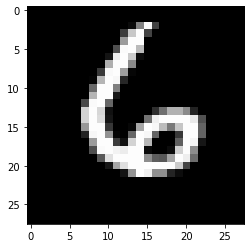

In [50]:
testdata = datasets.MNIST('data/mnist_test', train=False, download=False, transform=transforms.ToTensor()) # download=True to download, train=False means test set

test_loader = torch.utils.data.DataLoader(testdata, batch_size=1, shuffle=True)

img, label = next(iter(test_loader))

predict = model(img.view(-1).unsqueeze(0))

_, predicted_label = torch.max(predict, dim=1)

print(predicted_label.item())

plt.imshow(img.reshape(28,28), cmap='gray')

# correct = 0
# total = 0
# with torch.no_grad():
# for imgs, labels in val_loader:
# batch_size = imgs.shape[0]
# outputs = model(imgs.view(batch_size, -1))
# _, predicted = torch.max(outputs, dim=1)
# total += labels.shape[0]
# correct += int((predicted == labels).sum())
# print("Accuracy: %f", correct / total)
# Accuracy: 0.794000

## Visualization

In [64]:
!rm -rf runs
writer = SummaryWriter('runs/mnist')

### add loss

In [65]:
n_epochs = 10
learning_rate = 0.1
for epoch in range(n_epochs):
    epoch_loss = 0
    for img, label in train_loader:
        label_one_hot = torch.zeros(batch_sz, 10).scatter_(1, label.view(batch_sz,1), 1.0)
        predict = model(img.view(batch_sz, -1))
        curr_loss = loss(predict, label_one_hot)
    
        optimizer.zero_grad()
        curr_loss.backward()
        optimizer.step()
        
        epoch_loss += curr_loss
    
    writer.add_scalar("Loss/train", epoch_loss, epoch)
    print("Epoch: %d, Loss: %f" % (epoch, float(epoch_loss)))

Epoch: 0, Loss: 2.392365
Epoch: 1, Loss: 2.389013
Epoch: 2, Loss: 2.386089
Epoch: 3, Loss: 2.383407
Epoch: 4, Loss: 2.379947
Epoch: 5, Loss: 2.377138
Epoch: 6, Loss: 2.374565
Epoch: 7, Loss: 2.371121
Epoch: 8, Loss: 2.368360
Epoch: 9, Loss: 2.365289


### add model

In [66]:
img, _ = next(iter(train_loader))
writer.add_graph(model, img.view(batch_sz,-1))

In [67]:
writer.flush()
writer.close()

In [62]:
!tensorboard --logdir=runs/mnist

TensorFlow installation not found - running with reduced feature set.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.4.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C
